# Milestone 1 - Phase 2 - FTDS (Offline)

## I. Introduction
- Peter Zultan
- HCK-001

## II. Dataset
Telco Customer Churn
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## III. Objective
Create Artificial Neural Network to analyze customer churn from the dataset.

## IV. Import Libraries

In [1]:
import phik
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random

#check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For Handling Outliers
from feature_engine.outliers import Winsorizer

# For Data Balancing
from imblearn.over_sampling import SMOTENC

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report

import pickle

random.seed(1)

## V. Data Loading

In [2]:
#load data 
df = pd.read_csv("h8dsft_Milestone1P2_Peter Z.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#check dataframes shape
print("df shape: ", df.shape)

df shape:  (7043, 21)


## VI. Data Cleaning

In [4]:
print(df.isnull().sum().to_string()) #to show all of the rows of null columns in dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0


No null value in dataset

In [5]:
df.duplicated(keep = 'last')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

No duplicated values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
dfcopy = df.copy()

In [8]:
dfcopy[(dfcopy['TotalCharges'] == " ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 values in `TotalCharges` only contain space. It can be treated as missing values.

In [9]:
dfcopy = dfcopy[(dfcopy['TotalCharges'] != " ")]

Discard missing values from dataset.

In [10]:
#convert TotalCharges column datatype to float
dfcopy['TotalCharges'] = dfcopy['TotalCharges'].astype(float)

In [11]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
#lower case all of the columns name
dfcopy.columns = dfcopy.columns.str.lower()
dfcopy.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [13]:
#encode categorical value to numerical value
dfcopy.loc[dfcopy['churn']== 'No', 'churn'] = 0
dfcopy.loc[dfcopy['churn']== 'Yes', 'churn'] = 1

In [14]:
dfcopy.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [15]:
#convert TotalCharges column datatype to int
dfcopy['churn'] = dfcopy['churn'].astype(int)

In [16]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


## VII. Exploratory Data Analysis

Skweness value:  -0.22210292770166232
Mean value:  64.79820819112632
Median value:  70.35
Min value:  18.25
Max value:  118.75


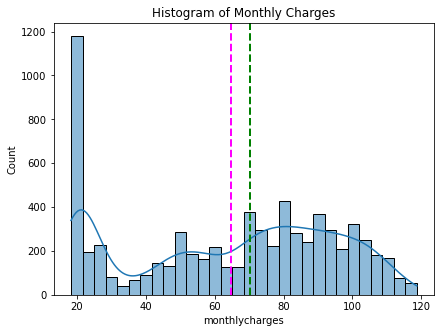

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(dfcopy['monthlycharges'], bins=30, kde=True)
plt.axvline(dfcopy['monthlycharges'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dfcopy['monthlycharges'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Monthly Charges')

print('Skweness value: ', dfcopy['monthlycharges'].skew())
print('Mean value: ', dfcopy['monthlycharges'].mean())
print('Median value: ', dfcopy['monthlycharges'].median())
print('Min value: ', dfcopy['monthlycharges'].min())
print('Max value: ', dfcopy['monthlycharges'].max())

Most of the customer monthly charges are around $20 and $80. The data is binomial distributed, central tendency of the data is median ($70.35).

In [23]:
dfcopy['seniorcitizen'].value_counts()

0    5890
1    1142
Name: seniorcitizen, dtype: int64

<AxesSubplot:xlabel='seniorcitizen', ylabel='count'>

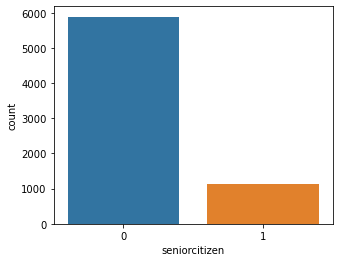

In [18]:
plt.figure(figsize=(5, 4))
sns.countplot(data=dfcopy, x='seniorcitizen')

Data are dominated by adolescent

In [19]:
senior = dfcopy.groupby(["seniorcitizen",'internetservice'])['gender'].count()
senior

seniorcitizen  internetservice
0              DSL                2157
               Fiber optic        2265
               No                 1468
1              DSL                 259
               Fiber optic         831
               No                   52
Name: gender, dtype: int64

The data tell most of senior citizen do not use internet service compared to adolescent. This happen probably adolescent are quick to adapt with new technology and for no internet service are caused by the area do not have the infrastructure for internet.  

In [22]:
dfcopy['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

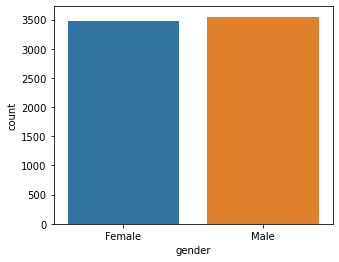

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=dfcopy, x='gender')

Female and Male composition in the dataset are considered balance

In [ ]:
dfcopy.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
test = dfcopy.copy()

In [ ]:
cols = ['tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

for i in cols:
    print(i, 'unique',dfcopy[i].unique() )

tenure unique [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
phoneservice unique ['No' 'Yes']
multiplelines unique ['No phone service' 'No' 'Yes']
internetservice unique ['DSL' 'Fiber optic' 'No']
onlinesecurity unique ['No' 'Yes' 'No internet service']
onlinebackup unique ['Yes' 'No' 'No internet service']
deviceprotection unique ['No' 'Yes' 'No internet service']
techsupport unique ['No' 'Yes' 'No internet service']
streamingtv unique ['No' 'Yes' 'No internet service']
streamingmovies unique ['No' 'Yes' 'No internet service']
contract unique ['Month-to-month' 'One year' 'Two year']
paperlessbilling unique ['Yes' 'No']
paymentmethod unique ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
cols = ['phoneservice','onlinesecurity','onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

for i in cols:
    test.loc[test[i]== 'No', i] = 0
    test.loc[test[i]== 'Yes', i] = 1
    test.loc[test[i]== 'No internet service', i] = 2

In [ ]:
test.loc[test['gender']== 'Male', 'gender'] = 0
test.loc[test['gender']== 'Female', 'gender'] = 1

The gender between female and male are considered balance

In [ ]:
test.loc[test['monthlycharges']<= 70.35, 'monthlycharges'] = 0
test.loc[test['monthlycharges']> 70.35, 'monthlycharges'] = 1

change monthlycharges value, if less than 70.35 mean low frequently customer symbolize by 0 and high frequently customer symbolize by 1 

Skweness value:  0.23773083190513133
Mean value:  32.421786120591584
Median value:  29.0
Min value:  1
Max value:  72


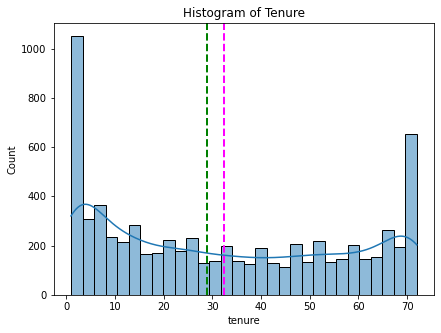

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(dfcopy['tenure'], bins=30, kde=True)
plt.axvline(dfcopy['tenure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dfcopy['tenure'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Tenure')

print('Skweness value: ', dfcopy['tenure'].skew())
print('Mean value: ', dfcopy['tenure'].mean())
print('Median value: ', dfcopy['tenure'].median())
print('Min value: ', dfcopy['tenure'].min())
print('Max value: ', dfcopy['tenure'].max())

In [25]:
tenure = dfcopy['tenure'].value_counts()

Most of the customer tenure are in the early months and >=70 months. The data is binomial distributed, central tendency of the data is median (29 months).

In [ ]:
test.loc[test['tenure']<= 29, 'tenure'] = 0
test.loc[test['tenure']> 29, 'tenure'] = 1

Customer with tenure <= 29 is unloyal symbolize with 0 and customer with tenure >29 is loyal and symbolize with 1

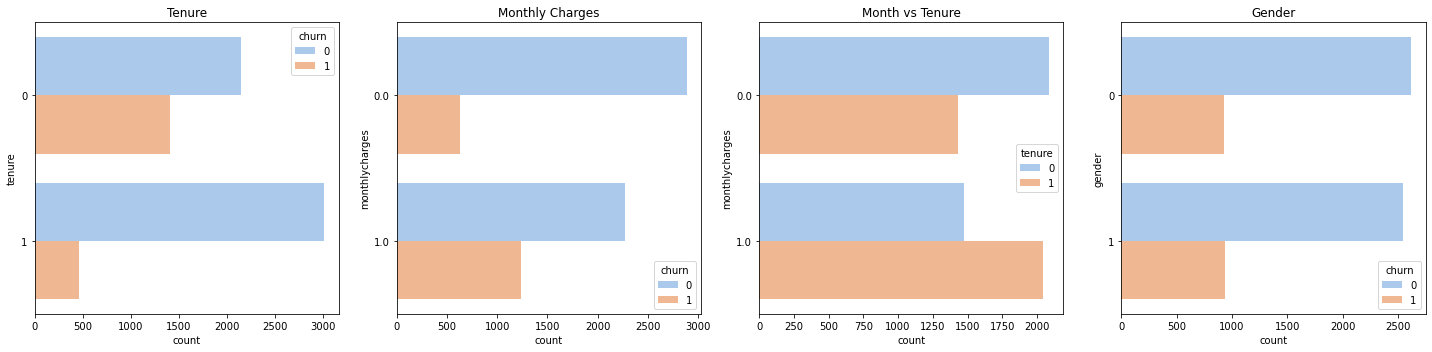

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(hue = 'churn', y = 'tenure', data=test, palette="pastel")
plt.title('Tenure')

plt.subplot(1,4,2)
sns.countplot(hue = 'churn', y = 'monthlycharges', data=test, palette="pastel")
plt.title('Monthly Charges')

plt.subplot(1,4,3)
sns.countplot(hue = 'tenure', y = 'monthlycharges', data=test, palette="pastel")
plt.title('Month vs Tenure')

plt.subplot(1,4,4)
sns.countplot(hue = 'churn', y = 'gender', data=test, palette="pastel")
plt.title('Gender')

plt.tight_layout()

plt.show()

- Customer with longer tenure has lower tendency to churn rather than customer with shorter tenure.

- Highly activated or user with lot of facilities has higher churn compared to lower activated or less facilities user.

- Shorter tenure usually has lower monthly charges compared to longer tenure customer.

- Both male and gender has quiet same churn tendency.

## VIII. Data Pre-Processing

### a. Get Data Inference

In [ ]:
#drop customerid column
dfcopy.drop(columns='customerid', axis=1, inplace=True)

In [ ]:
dfcopy.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [ ]:
# Get Data for Model Inference
inf = dfcopy.sample(10, random_state=1)

In [ ]:
inf.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1778,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,0
5036,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,1


In [ ]:
#drop inference data
dfcopy = dfcopy.drop(inf.index)
dfcopy

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Inference data has been dropped.

### b. Split Data Train, Test, Val

In [ ]:
#Split data to feature and target
y = dfcopy.pop('churn') #data for target
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7022, dtype: int32

In [ ]:
#Features data
x = dfcopy

In [ ]:
#Split Train, Test, Val
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)
print('Val Size  : ', x_val.shape)
print('Target Train : ', y_train.shape)
print('Target Test : ', y_test.shape)
print('Target Val : ',  y_val.shape)

Train Size :  (4493, 19)
Test Size  :  (1405, 19)
Val Size  :  (1124, 19)
Target Train :  (4493,)
Target Test :  (1405,)
Target Val :  (1124,)


### c. Correlation and Multicollinearity

In [ ]:
#get target data to calculate correlation for feature selection
x_train['churn'] = y_train

interval columns not set, guessing: ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']


<AxesSubplot:>

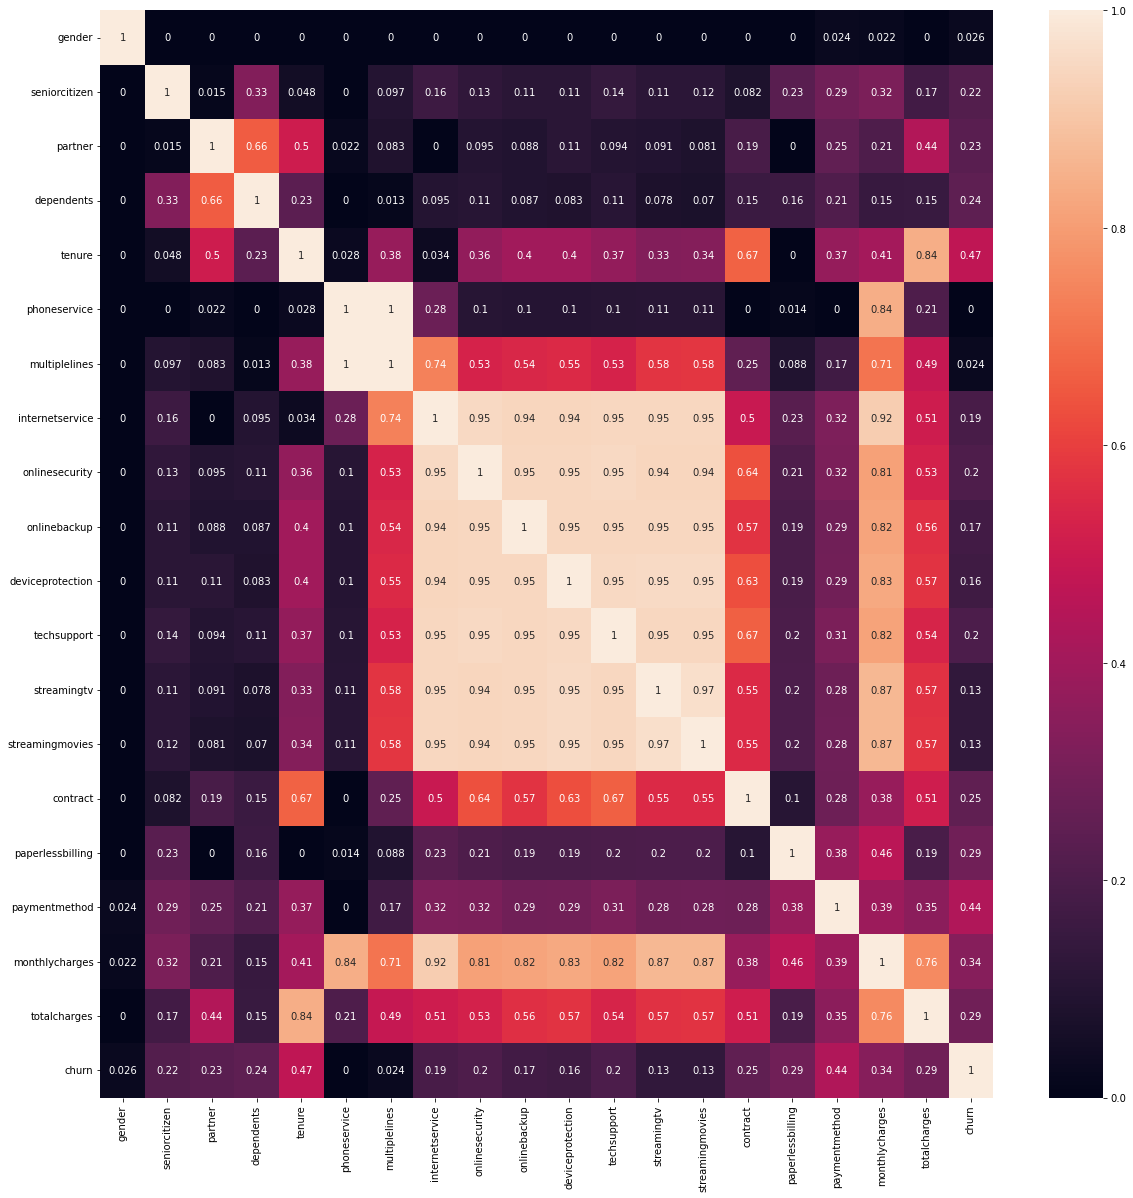

In [ ]:
# Calculate correlation using phik matrix
plt.figure(figsize=(20, 20))
sns.heatmap(x_train.phik_matrix(), vmin = 0, vmax = 1, annot = True)

Churn has moderate correlation with tenure, paperlessbilling, payment method, and monthlycharges.

In [ ]:
cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges']

In [ ]:
#iteration to find unique values for each column and find which column can't be calculated using vif 
for i in cols:
    print(i, 'unique: ', x_train[i].unique())

gender unique:  ['Male' 'Female']
seniorcitizen unique:  [0 1]
partner unique:  ['No' 'Yes']
dependents unique:  ['No' 'Yes']
tenure unique:  [15 53 49 17 72 68 20 71 60 70  9  3 63 24  8  5 27  1 12 38 67 29 13 26
 33 55 54 34 31 43 66 40 62 59 42 50 37 10 35 51 56 22  7  4  2 46 19  6
 18 58 44 25 52 21 61 30 14 16 45 47 32 57 11 36 65 41 64 69 48 23 39 28]
phoneservice unique:  ['Yes' 'No']
multiplelines unique:  ['Yes' 'No phone service' 'No']
internetservice unique:  ['No' 'DSL' 'Fiber optic']
onlinesecurity unique:  ['No internet service' 'No' 'Yes']
onlinebackup unique:  ['No internet service' 'Yes' 'No']
deviceprotection unique:  ['No internet service' 'Yes' 'No']
techsupport unique:  ['No internet service' 'No' 'Yes']
streamingtv unique:  ['No internet service' 'Yes' 'No']
streamingmovies unique:  ['No internet service' 'Yes' 'No']
contract unique:  ['Month-to-month' 'One year' 'Two year']
paperlessbilling unique:  ['Yes' 'No']
paymentmethod unique:  ['Electronic check' 'Bank 

`paperlessbilling`, `seniorcitizen`, `partner`, `dependents`, and `phoneservice` will not be calculated in VIF test because after encoding it only contain 0 and 1. It will cause error if calculated with VIF.

In [ ]:
df_select = x_train.copy()
df_select

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2825,Male,0,No,No,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,26.35,378.60,0
2940,Male,1,No,No,53,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55,1
2730,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),106.65,5168.10,0
4503,Female,0,No,No,17,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.40,1617.50,1
6923,Female,0,Yes,No,53,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Bank transfer (automatic),74.10,3833.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,Female,0,No,No,27,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.20,2383.60,0
6573,Female,0,Yes,Yes,45,No,No phone service,DSL,No,Yes,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),51.00,2264.50,0
3993,Female,0,No,Yes,70,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Electronic check,66.00,4891.50,0
3081,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,77.85,299.20,1


In [ ]:
oec = OrdinalEncoder()#encode function using ordinal encoder

#encode data
oec.fit(df_select[['multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paymentmethod']])

#encoded data applied
df_select[['multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paymentmethod']] = oec.transform(df_select[['multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paymentmethod']])

df_select.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2825,Male,0,No,No,15,Yes,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,2.0,26.35,378.60,0
2940,Male,1,No,No,53,No,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,Yes,2.0,54.45,2854.55,1


In [ ]:
s = df_select[['multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paymentmethod']] #selected features engine

vif=pd.DataFrame()
vif['features'] = s.columns
vif['VIF'] = [variance_inflation_factor(s, i) for i in range(s.shape[1])]

vif

,features,VIF
0,multiplelines,1.935018
1,internetservice,2.273338
2,onlinesecurity,2.110873
3,onlinebackup,2.214265
4,deviceprotection,2.559260
5,techsupport,2.313443
6,streamingtv,2.949768
7,streamingmovies,2.980593
8,contract,2.658304
9,paymentmethod,2.234283


There are no multicollinearity in each features.

### d. Feature Selection

In [ ]:
x_train.pop('churn') #drop churn column

2825    0
2940    1
2730    0
4503    1
6923    0
       ..
5781    0
6573    0
3993    0
3081    1
572     0
Name: churn, Length: 4493, dtype: int32

In [ ]:
x_train

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
2825,Male,0,No,No,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,26.35,378.60
2940,Male,1,No,No,53,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55
2730,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),106.65,5168.10
4503,Female,0,No,No,17,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.40,1617.50
6923,Female,0,Yes,No,53,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Bank transfer (automatic),74.10,3833.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,Female,0,No,No,27,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.20,2383.60
6573,Female,0,Yes,Yes,45,No,No phone service,DSL,No,Yes,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),51.00,2264.50
3993,Female,0,No,Yes,70,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Electronic check,66.00,4891.50
3081,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,77.85,299.20


In [ ]:
print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)
print('Val Size  : ', x_val.shape)

Train Size :  (4493, 19)
Test Size  :  (1405, 19)
Val Size  :  (1124, 19)


### e. Splitting Categorical and Numercial

In [ ]:
#Separate Numerical Columns and Categorical Columns

num_columns = x_train.select_dtypes(include=np.number).columns.tolist() 
cat_columns = x_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
Categorical Columns :  ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [ ]:
num_columns.pop(0)
num_columns

['tenure', 'monthlycharges', 'totalcharges']

`seniorcitizen` removed because it is categorical data

In [ ]:
train_num = x_train[num_columns]
train_cat = x_train[cat_columns]

val_num = x_val[num_columns]
val_cat = x_val[cat_columns]

test_num = x_test[num_columns]
test_cat = x_test[cat_columns]

### f. Handling Outliers

In [ ]:
#function for plotting histogram and boxplot
def plotting (x_train_model, feature):
    #figure size
    plt.figure (figsize=(15,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(x_train_model[feature], bins=50)
    plt.title('Histogram')

    #Boxplot
    plt.subplot (1,2,2)
    sns.boxplot(y=x_train_model[feature])
    plt.title('Boxplot')

    plt.show()

=============== tenure ===============


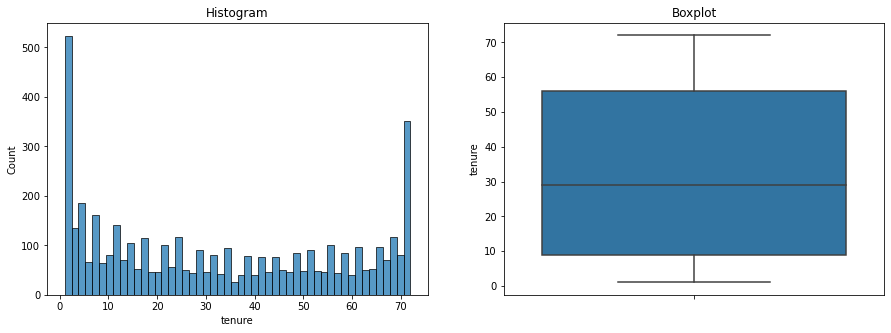

tenure 
Skweness Value:  0.2528484999581152
=============== monthlycharges ===============


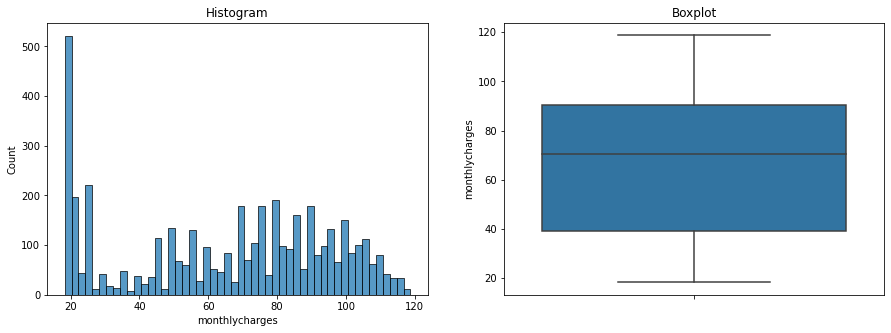

monthlycharges 
Skweness Value:  -0.12949916807137982
=============== totalcharges ===============


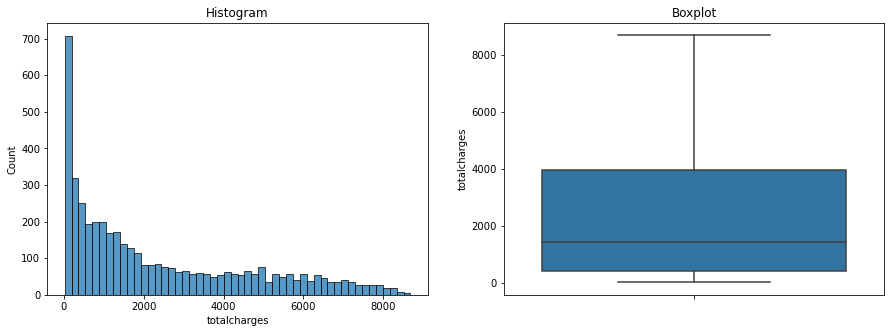

totalcharges 
Skweness Value:  1.0599560273489452


In [ ]:
#plot distance to find data distribution and outliers
for i in num_columns: 
    print('='*15, i , '='*15)
    plotting(train_num, i)
    print(i, '\nSkweness Value: ', test_num[i].skew())

There are no outliers in data and only `totalcharges` data is skewed.

### g. Feature Scaling

In [ ]:
#scale dataframe to improve stability and performance
ss = StandardScaler()
ss.fit(train_num)

train_scaled = ss.transform(train_num)
test_scaled = ss.transform(test_num)
val_scaled = ss.transform(val_num)

In [ ]:
train_scaled = pd.DataFrame(train_scaled)
test_scaled =  pd.DataFrame(test_scaled)
val_scaled = pd.DataFrame(val_scaled)

In [ ]:
train_scaled.head(3)

,0,1,2
0,-0.728523,-1.298235,-0.857998
1,0.821525,-0.363718,0.225591
2,0.658362,1.372290,1.238106


### h. Feature Encoding

In [ ]:
cat_columns

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
#Ordinal encoder is used because object has rank
oec = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=5)#encode function using ordinal encoder

#encode data
oec.fit(train_cat[cat_columns])

#encoded data applied
train_cat[cat_columns] = oec.transform(train_cat[cat_columns])
test_cat[cat_columns] = oec.transform(test_cat[cat_columns])
val_cat[cat_columns] = oec.transform(val_cat[cat_columns])

C:\Users\Peter\AppData\Local\Temp\ipykernel_6644\2948940238.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat[cat_columns] = oec.transform(train_cat[cat_columns])
C:\Users\Peter\AppData\Local\Temp\ipykernel_6644\2948940238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat[cat_columns] = oec.transform(test_cat[cat_columns])
C:\Users\Peter\AppData\Local\Temp\ipykernel_6644\2948940238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
train_cat.head(3)

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
2825,1.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0
2940,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
2730,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0


In [ ]:
val_cat.head(3)

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
2519,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0
797,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1532,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
test_cat.head(3)

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
2764,1.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0
2237,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0
337,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


### i. Concate between Numerical Columns and Categorical Columns

In [ ]:
train_final = pd.concat([train_scaled,train_cat.reset_index(drop=True)], axis =1)
test_final = pd.concat([test_scaled,test_cat.reset_index(drop=True)], axis =1)
val_final = pd.concat([val_scaled, val_cat.reset_index(drop=True)], axis=1)

In [ ]:
train_final = pd.concat([train_final,x_train['seniorcitizen'].reset_index(drop=True)], axis =1)
test_final = pd.concat([test_final,x_test['seniorcitizen'].reset_index(drop=True)], axis =1)
val_final = pd.concat([val_final, x_val['seniorcitizen'].reset_index(drop=True)], axis=1)

In [ ]:
train_final

,0,1,2,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,seniorcitizen
0,-0.728523,-1.298235,-0.857998,1.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0
1,0.821525,-0.363718,0.225591,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1
2,0.658362,1.372290,1.238106,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,0
3,-0.646941,0.964893,-0.315799,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0
4,0.821525,0.289779,0.654221,0.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,-0.239034,0.791958,0.019482,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,1.0,2.0,0
4489,0.495199,-0.478454,-0.032642,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0
4490,1.514968,0.020399,1.117053,0.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0
4491,-1.177221,0.414493,-0.892747,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0


### j. Class Balancing

In [ ]:
smotenc = SMOTENC([1], categorical_features=[3, 19], random_state = 1)

In [ ]:
train_final

,0,1,2,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,seniorcitizen
0,-0.728523,-1.298235,-0.857998,1.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0
1,0.821525,-0.363718,0.225591,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1
2,0.658362,1.372290,1.238106,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,0
3,-0.646941,0.964893,-0.315799,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0
4,0.821525,0.289779,0.654221,0.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,-0.239034,0.791958,0.019482,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,1.0,2.0,0
4489,0.495199,-0.478454,-0.032642,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0
4490,1.514968,0.020399,1.117053,0.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0
4491,-1.177221,0.414493,-0.892747,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0


In [ ]:
# Fitting and resampling dataset.
train_bal, y_bal = smotenc.fit_resample(train_final, y_train)

c:\Users\Peter\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
train_bal.columns

Index([                 0,                  1,                  2,
                 'gender',          'partner',       'dependents',
           'phoneservice',    'multiplelines',  'internetservice',
         'onlinesecurity',     'onlinebackup', 'deviceprotection',
            'techsupport',      'streamingtv',  'streamingmovies',
               'contract', 'paperlessbilling',    'paymentmethod',
          'seniorcitizen'],
      dtype='object')

In [ ]:
cols = ['partner',       'dependents',
           'phoneservice',    'multiplelines',  'internetservice',
         'onlinesecurity',     'onlinebackup', 'deviceprotection',
            'techsupport',      'streamingtv',  'streamingmovies',
               'contract', 'paperlessbilling',    'paymentmethod',
          'seniorcitizen']
for i in cols:
    train_bal[i] = train_bal[i].round(decimals = 0)

In [ ]:
y_bal

0       0
1       1
2       0
3       1
4       0
       ..
6593    1
6594    1
6595    1
6596    1
6597    1
Name: churn, Length: 6598, dtype: int32

Class Balance:  0    3299
1    1194
Name: churn, dtype: int64


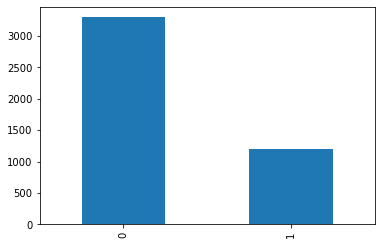

In [ ]:
# Before balancing.
y_train.value_counts().plot(kind='bar')
print("Class Balance: ", y_train.value_counts())

Class Balance:  0    3299
1    3299
Name: churn, dtype: int64


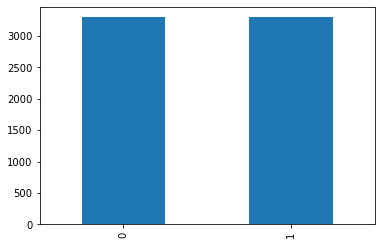

In [ ]:
# After balancing.
y_bal.value_counts().plot(kind='bar')
print("Class Balance: ", y_bal.value_counts())

In [ ]:
#drop gender column
train_bal.drop(columns=['gender'], inplace=True)

In [ ]:
#drop gender column
val_final.drop(columns=['gender'], inplace=True)

In [ ]:
#drop gender column
test_final.drop(columns=['gender'], inplace=True)

In [ ]:
train_bal

,0,1,2,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,seniorcitizen
0,-0.728523,-1.298235,-0.857998,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0
1,0.821525,-0.363718,0.225591,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1
2,0.658362,1.372290,1.238106,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,0
3,-0.646941,0.964893,-0.315799,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0
4,0.821525,0.289779,0.654221,1.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,-1.299593,0.118507,-0.993178,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
6594,-0.248412,-0.689635,-0.211116,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
6595,-0.486829,0.318048,-0.318491,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6596,-0.520824,-0.506722,-0.528505,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0


### k. TensorFlow Pipeline

In [ ]:
#Sequential & Functional
train = tf.data.Dataset.from_tensor_slices((train_bal, y_bal)).batch(64)
test = tf.data.Dataset.from_tensor_slices((test_final, y_test)).batch(64)
val = tf.data.Dataset.from_tensor_slices((val_final, y_val)).batch(64)

## IX. Model Definition

### a. Sequential API

In [ ]:
inp = train_final.shape[1]
out = 1
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)

In [ ]:
train_final.shape[1]

19

In [ ]:
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(inp, input_shape=(18,)))#input layer
model_seq.add(tf.keras.layers.Dense(3, activation='relu'))#hidden layer
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid'))#output layer
model_seq.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 19)                361       
                                                                 
 dense_10 (Dense)            (None, 3)                 60        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


### b. Functional API

In [ ]:
#Functional
input_lyr = tf.keras.Input(shape=(18,))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(3, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)
model_func.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_12 (Dense)            (None, 19)                361       
                                                                 
 batch_normalization_4 (Batc  (None, 19)               76        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 3)                 60        
                                                                 
 batch_normalization_5 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0   

## X. Model Training

### a. Sequential API

In [ ]:
history_seq = model_seq.fit(train, epochs = 15, validation_data=(val))

print("\nEvaluate on test data")
result_seq = model_seq.evaluate(test)
print('Test - Loss     : ', result_seq[0])
print('Test - Accuracy : ', result_seq[1])
print('')

Epoch 1/15
104/104 [==============================] - 2s 6ms/step - loss: 0.4705 - accuracy: 0.8295 - val_loss: 2.1465 - val_accuracy: 0.2678
Epoch 2/15
104/104 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8265 - val_loss: 4.3971 - val_accuracy: 0.2678
Epoch 3/15
104/104 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8298 - val_loss: 4.4752 - val_accuracy: 0.2678
Epoch 4/15
104/104 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8334 - val_loss: 4.5549 - val_accuracy: 0.2678
Epoch 5/15
104/104 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8339 - val_loss: 4.6274 - val_accuracy: 0.2678
Epoch 6/15
104/104 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8342 - val_loss: 4.6430 - val_accuracy: 0.2669
Epoch 7/15
104/104 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8337 - val_loss: 4.6390 - val_accuracy: 0.2669
Epoch 

### b. Functional API

In [ ]:
history_func = model_func.fit(train, epochs = 15, validation_data=(val))

## Evaluate on a func.
print("\nEvaluate on test data")
result_func = model_func.evaluate(test)
print('Test - Loss     : ', result_func[0])
print('Test - Accuracy : ', result_func[1])
print('')

Epoch 1/15
104/104 [==============================] - 3s 10ms/step - loss: 0.7805 - accuracy: 0.5491 - val_loss: 0.6669 - val_accuracy: 0.7073
Epoch 2/15
104/104 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.5665 - val_loss: 0.7151 - val_accuracy: 0.3772
Epoch 3/15
104/104 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.5677 - val_loss: 0.6997 - val_accuracy: 0.4582
Epoch 4/15
104/104 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.5668 - val_loss: 0.7391 - val_accuracy: 0.2856
Epoch 5/15
104/104 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.5681 - val_loss: 0.7277 - val_accuracy: 0.2891
Epoch 6/15
104/104 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.5950 - val_loss: 0.7350 - val_accuracy: 0.3149
Epoch 7/15
104/104 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6170 - val_loss: 0.7108 - val_accuracy: 0.4431
Epoch

## XI. Evaluation Train and Val Model

### a. Sequential API

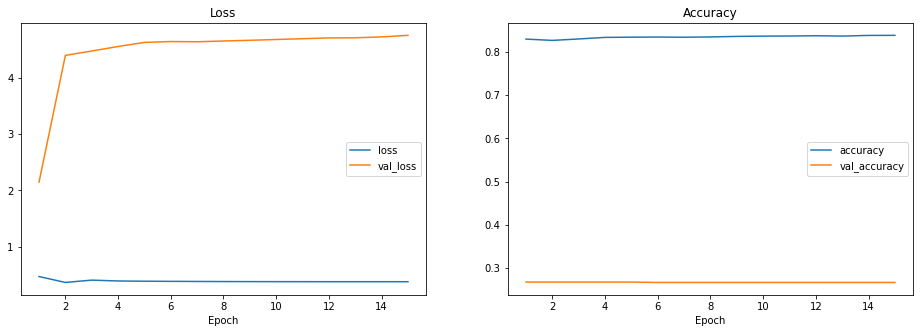

In [ ]:
epoch=15

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

### b. Functional API

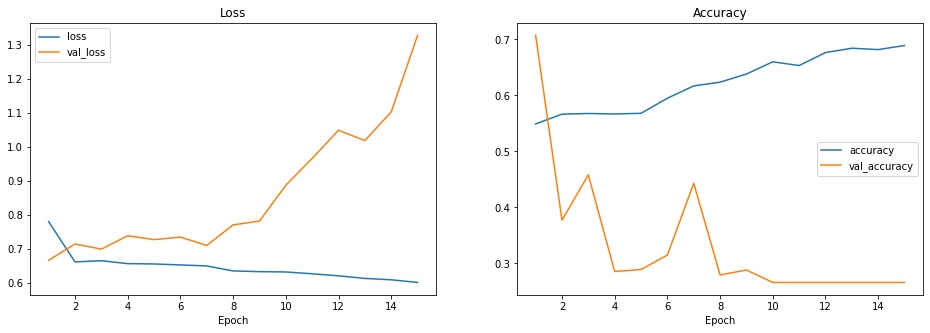

In [ ]:
epoch=15

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Both sequential and functional API has bad resul, it can be seen in sequential graph where train and loss graph are separated apart and never converge, it is same with accuracy graph too. Functional is better than sequential where in epoch 1 graph start from same point and then diverge, the accuracy is worse if seen from value because sequential train accuracy. Overall, the model is worst, it needs a lot of improvement.

## XII. Model Improvement

### a. Sequential API

In [ ]:
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(inp, input_shape=(18,)))#input layer
model_seq.add (tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dense(10, activation='relu'))#hidden layer
model_seq.add (tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dense(7, activation='relu'))#hidden layer
model_seq.add (tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dense(3, activation='relu'))#hidden layer
model_seq.add (tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dense(out, activation='hard_sigmoid'))#output layer
model_seq.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001,amsgrad=True ), metrics=['accuracy'])

c:\Users\Peter\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history_seq = model_seq.fit(train_bal, y_bal, epochs = 50, validation_data=(val_final, y_val))

Epoch 1/50
207/207 [==============================] - 4s 6ms/step - loss: 1.1088 - accuracy: 0.5393 - val_loss: 0.7591 - val_accuracy: 0.6744
Epoch 2/50
207/207 [==============================] - 1s 4ms/step - loss: 0.7107 - accuracy: 0.6056 - val_loss: 0.7968 - val_accuracy: 0.6895
Epoch 3/50
207/207 [==============================] - 1s 4ms/step - loss: 0.6411 - accuracy: 0.6543 - val_loss: 0.6813 - val_accuracy: 0.7233
Epoch 4/50
207/207 [==============================] - 1s 4ms/step - loss: 0.6209 - accuracy: 0.6754 - val_loss: 0.6721 - val_accuracy: 0.7198
Epoch 5/50
207/207 [==============================] - 1s 4ms/step - loss: 0.6016 - accuracy: 0.6866 - val_loss: 0.6014 - val_accuracy: 0.7393
Epoch 6/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5884 - accuracy: 0.7001 - val_loss: 0.5748 - val_accuracy: 0.7500
Epoch 7/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5720 - accuracy: 0.7148 - val_loss: 0.5600 - val_accuracy: 0.7544
Epoch 

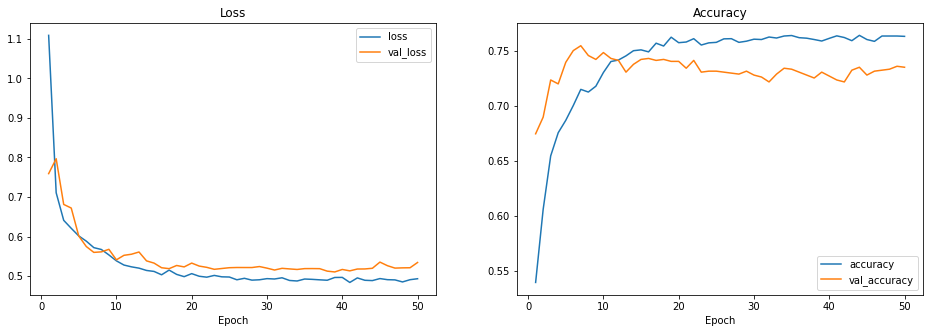

In [ ]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [ ]:
pred_test = model_seq.predict(test_final)
pred_test = np.round_(pred_test)
print("Test")
print(classification_report(y_test,pred_test))

44/44 [==============================] - 0s 2ms/step
Test
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1032
           1       0.55      0.75      0.63       373

    accuracy                           0.77      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.80      0.77      0.78      1405



In [ ]:
# Freezing the final model
model_func.trainable=False

In [ ]:
model_seq.save('model_seq_churn.h5')

### b. Functional API

In [ ]:
#Functional
input_lyr = tf.keras.Input(shape=(18,))
layers = tf.keras.layers.Dense(inp)(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(10, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(7, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(2, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
output = tf.keras.layers.Dense(out, activation='hard_sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)
model_func.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001,amsgrad=True), loss='binary_crossentropy', metrics=['accuracy'])
model_func.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_20 (Dense)            (None, 19)                361       
                                                                 
 batch_normalization_10 (Bat  (None, 19)               76        
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 10)                200       
                                                                 
 batch_normalization_11 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 7)                 77  

c:\Users\Peter\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history_func = model_func.fit(train_bal, y_bal, epochs = 50, validation_data=(val_final, y_val))

Epoch 1/50
207/207 [==============================] - 4s 8ms/step - loss: 0.6717 - accuracy: 0.6358 - val_loss: 0.6168 - val_accuracy: 0.6557
Epoch 2/50
207/207 [==============================] - 1s 3ms/step - loss: 0.5742 - accuracy: 0.7228 - val_loss: 0.5469 - val_accuracy: 0.7153
Epoch 3/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5426 - accuracy: 0.7423 - val_loss: 0.5473 - val_accuracy: 0.7126
Epoch 4/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5305 - accuracy: 0.7445 - val_loss: 0.5328 - val_accuracy: 0.7304
Epoch 5/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5204 - accuracy: 0.7543 - val_loss: 0.5326 - val_accuracy: 0.7358
Epoch 6/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5173 - accuracy: 0.7495 - val_loss: 0.5412 - val_accuracy: 0.7367
Epoch 7/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5369 - accuracy: 0.7516 - val_loss: 0.5617 - val_accuracy: 0.7375
Epoch 

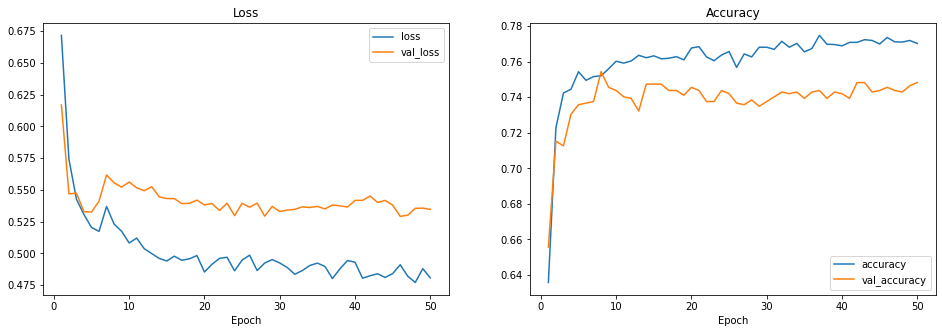

In [ ]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [ ]:
pred_test = model_func.predict(test_final)
pred_test = np.round_(pred_test)
print("Test")
print(classification_report(y_test,pred_test))

44/44 [==============================] - 0s 2ms/step
Test
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1032
           1       0.55      0.72      0.62       373

    accuracy                           0.77      1405
   macro avg       0.72      0.75      0.73      1405
weighted avg       0.80      0.77      0.78      1405



In [ ]:
# Freezing the final model
model_func.trainable=False

In [ ]:
#save model functional API
model_func.save('model_func_churn.h5')

From the classification report, sequential model is better than functional model because recall for 1 is higher. Recall 1 is needed because it is better for false predicting churn customer to be churn, from this false prediction company can delivered effective marketing campaign which lower churn tendency. 

## XIII. Model Inference

In [ ]:
inf.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1778,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,0
5036,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,1


In [ ]:
#encode categorical value to numerical value
inf.loc[inf['churn']== 'No', 'churn'] = 0
inf.loc[inf['churn']== 'Yes', 'churn'] = 1

In [ ]:
num_columns

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
#gender has been dropped
cat_columns.pop(0)

'gender'

In [ ]:
cat_columns

['partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
num_pipe = Pipeline([
    ('scaling', ss)
])
cat_pipe = Pipeline([
    ('encoding', oec)
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
])

In [ ]:
preprocess.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['seniorcitizen', 'tenure', 'monthlycharges',
                                  'totalcharges']),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=5))]),
                                 ['partner', 'dependents', 'phoneservice',
                                  'multiplelines', 'internetservice',
                                  'onlinesecurity', 'onlinebackup',
                                  'deviceprotection', 'techsupport',
                                  'streamingtv', 'streamingmovies', 'contract',
                                  'paperlessbilling', 'paymentmethod'])])

In [ ]:
#saving pipeline
pickle.dump(preprocess, open('pipe.pkl', 'wb'))

In [ ]:
inf_final = preprocess.transform(inf)

In [ ]:
pred_inf = model_seq.predict(inf_final)
pred_inf=pd.DataFrame(np.round_(pred_inf), columns=['predicted_churn'])
pred_inf

1/1 [==============================] - 0s 36ms/step


,predicted_churn
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
inf.reset_index(drop=True, inplace=True)

In [ ]:
pd.concat([inf, pred_inf], axis=1)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,predicted_churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,0,0.0
1,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,1,0.0
2,Female,0,No,No,63,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,0,1.0
3,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.85,663.55,0,0.0
4,Female,0,No,No,13,Yes,No,Fiber optic,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,81.15,952.30,1,0.0
5,Male,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.30,144.00,0,0.0
6,Male,0,No,Yes,30,No,No phone service,DSL,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.50,1307.80,0,0.0
7,Female,1,Yes,No,47,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,80.35,3825.85,1,0.0
8,Female,0,No,Yes,35,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,0,0.0
9,Male,1,Yes,Yes,32,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.95,2861.45,0,0.0


## XIV. Conclusion

From the EDA, dataset tells most of the customer monthly charges are around $20 and $80. There are a lot of new customers shown by histogram of tenure where <5months tenure is the highest and >70 months tenure customers are 2nd highest. There are tendency which customer with high tenure are most loyal. Churn do not affected by gender, lower monthly charges payment has lower churn compared to higher charges payment.

From the classification report, sequential model is better than functional model because recall for 1 is higher. Recall 1 is needed because it is better for false predicting churn customer to be churn, from this false prediction company can delivered effective marketing campaign which lower churn tendency.

The model doesn't work really well with most of the 1 value is predicted as 0 and only one 0 value is predicted as 1.